Before we start: please fill out our weekly attendance form! https://forms.gle/njrwXR9r416yzXnn7

Fall quarter outline:

* Week 3: Introduction
* Week 4: Data retrieval and preparation
* Week 5: Exploratory data analysis (EDA)
* **Week 6: Modeling and machine learning, part 1**
    * What is machine learning?
        * Types of ML models
    * Unsupervised learning
        * K-Means clustering, PCA
    * Supervised learning
        * Fundamental concepts:
            * Train-test split, overfitting/underfitting, bias-variance tradeoff

* Week 7: Modeling and machine learning, part 2
* *Week 8: Thanksgiving*
* Week 9: Neural networks 

A reminder of where we are in the data science process:

<img src="https://miro.medium.com/max/1200/1*eE8DP4biqtaIK3aIy1S2zA.png" width="800">

### Mounting Google Drive

Don't worry about this; this bit of code is only necessary because we're working in Google Colab instead of Jupyter Notebook. I'm mounting Google Drive to this notebook so that I can access files that are stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "drive/My Drive/DSU 2020-2021/Curriculum/Datasets"

In [ ]:
!ls

# What is machine learning?

A brief history lesson: back in 1959, IBM employee Arthur Samuel coined the term **machine learning**, which he defined as "a field of study that gives computers the ability to learn without being explicitly programmed."

But while this definition is great and all, it doesn't tell us anything about *how* a machine actually *learns*. 

## How does machine learning work?

*All* machine learning is done through machine learning **algorithms**, which are designed by experts to handle specific types of tasks or problems (more on this below).

All of these algorithms use **training data** to improve their performance, and in theory, the more data you feed an ML algorithm, the better it gets at its assigned task (just like how a person gets better at their job through experience). Per the editor of *Introducing Data Science*, "Machine learning is the process by which a computer can work more accurately as it collects and learns from the data it is given."

For the more computer science-savvy folks, another way to describe machine learning is as follows: 

"A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E." &mdash; Tom Mitchell

* Example: playing checkers.
    * E = the experience of playing many games of checkers
    * T = the task of playing checkers.
    * P = the probability that the program will win the next game.

# Types of ML models

## Supervised vs Unsupervised

There are two main types of machine learning: unsupervised learning and supervised learning. The key difference between them is whether or not the training data is *labeled*, i.e., whether we tell the computer what the "correct" output (given the training data) should be.

In **supervised learning**, we are given a dataset and already know what our correct output should look like. We have an idea that there should be some relationship between the input and the output. In general, most of our problems will be supervised.

In **unsupervised learning**, we approach problems with little or no idea what our results should look like. We can derive structure from data where we don't necessarily know the effect of the variables.

<span style="font-size:8pt;">
[Note: there's also reinforcement learning, where a computer learns through trial and error, but that's beyond our scope.]
</span>

## Breaking it down further:

### Supervised:

<!-- **Two categories:** -->

* **Regression** &mdash; predict results within a continuous output

  e.g. predicting chance of admission based on GPA, TOEFL, research experience

* **Classification** &mdash; predict results within a discrete output
  
  e.g. intended major based on GPA, SAT; chance of admission as high, medium, or low


### Unsupervised:

<!-- **Two categories:** -->

* **Clustering** &mdash; grouping data points based on relationships among the input variables
  
  e.g. social network analysis; market segments

* **Non-clustering** &mdash; find structure in a chaotic environment
  
  e.g. signal separation (cocktail party algorithm); density estimation

---

### Quiz:
**Which of the following are supervised learning problems?**

**A.** A company wants put its customers into groups based on their traits so that the company can build a recommendation system that will advertise products based on what are purchased by other customers in the same group.

**B.** A doctor needs to identify if a patient's tumor is benign or cancerous based on medical records he has seen in the past.

**C.** A researcher wants to predict one's salary based on year of experience, gender, beginning salary.

**D.** A researcher wants to find out if gender affects one's salary.


# The scikit-learn package

Before we dive into any coding examples, we need to introduce the [scikit-learn package](https://scikit-learn.org/stable/index.html).

Scikit-learn, or `sklearn` for short, is a free, open-source machine learning library for Python built on top of NumPy, SciPy, and matplotlib. It includes implementations of loads of useful ML algorithms: see the [user guide](https://scikit-learn.org/stable/user_guide.html) for a full list. 

Sklearn also has some other useful tools for data modeling such as `sklearn.model_selection`, and for other steps of the data science process such as `sklearn.preprocessing`.

In general, when you perform modeling through `sklearn`, you'll be interacting with different types *estimator* objects, depending on which ML algorithm you choose. However, all estimator objects in `sklearn` work in generally the same way. 


Once you've chosen which ML algorithm to use, you initialize the model after importing it from the correct module:

```
from sklearn.[module] import [Estimator]

model = Estimator([optional parameters])
```

Each algorithm takes in a variety of optional parameters, which you can specify if you'd like to use a non-default value. The parameters and their defaults will vary by algorithm, so make sure to read the documentation as needed.

After initializing the model, all you have to do is call the `.fit()` method on your training data:

```
model.fit(X)
```

and the model will train itself using the data in `X`. Per the [sklearn FAQ](https://scikit-learn.org/stable/faq.html), `X` must be numeric data stored as a `numpy` array (or `scipy` sparse matrix). This includes `pandas.DataFrame` since they're convertible to `numpy` arrays.

Then, depending on the type of your model, you can call the `.predict()` or `.transform()` methods to generate predictions or results from the training data (or new data):

```
predictions = model.predict(X) # supervised
       OR
results = model.transform(X) # unsupervised
```

And that's it! Each model will also have a number of additional methods and attributes that you can access, but again, you'll have to refer to the documentation as you go.

# Unsupervised Learning

As mentioned earlier, **most of the problems you'll be tackling** through your data science projects **will be supervised**. However, it's still helpful to be familiar with some unsupervised ML algorithms, as they do have applications as well.

We'll be going through two code examples from *Introducing Data Science*, which cover two algorithms: principal component analysis (PCA) and K-means clustering.

## PCA

**Principal component analysis**, or **PCA**, is a signal decomposition algorithm which allows us to find the latent variables in our data while retaining as much information as possible. In mathematical terms, it finds the linear combinations of the variables which *explain the most variance* within the data.

PCA is most useful as a **dimension reduction** technique, for when we have too many variables to handle and want to shrink the size of our data before we run other ML algorithms on it.

First, importing the libraries we're familiar with as well as the Red Wine Quality dataset from the UCI ML Respository:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep= ";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Suppose we eventually want to train a model to predict wine `quality`, but we don't want to work with 11 variables since that's a bit too many. First, we can break up our data into `X` and `y`:

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

Then, we center and scale (i.e., take the z-scores of) the training data using `sklearn.preprocessing.StandardScaler()`, so that each variable has the same variance &mdash; we don't want any of the variables to outweigh the others:

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# This does the same thing, using pandas operations:
# X_scaled = (X - X.mean()) / X.std()

Then, running the PCA algorithm and plotting results:

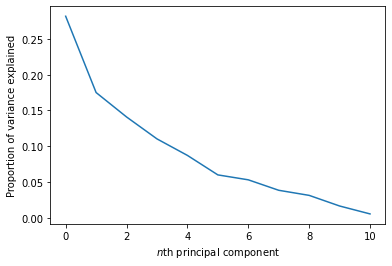

In [ ]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(X_scaled)

plt.plot(model.explained_variance_ratio_)
plt.xlabel('$n$th principal component')
plt.ylabel('Proportion of variance explained')
plt.show()

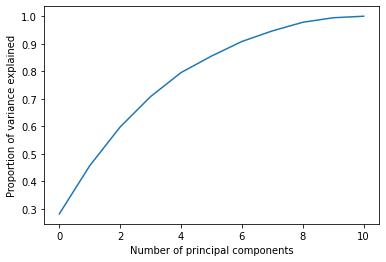

In [ ]:
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')
plt.show()

From this plot, we can see that to keep around 90% of the "information" of the training data, we only need to take the first 6 or 7 principal components.

To see what the principal components actually are, we can look at the `.components_` attribute:

In [ ]:
pd.DataFrame(model.components_, columns=X.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


Transforming the training data according to the principal components:

In [ ]:
results = model.transform(X_scaled)
pd.DataFrame(results).add_prefix("Component")

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


And we can keep as many principal components as we'd like. We can also specify how many components we want when we initialize the model (by default, it just gives us all of them).

The one major downside of PCA is that the resulting components aren't very interpretable: the only way to really guess what they can represent is to closely examine `model.components_`.

## K-means clustering

**K-means clustering** is one of the most basic **clustering** algorithms. It divides a set of training observations into $K$ *clusters* (or groups) by minimizing the sum-of-squares within each cluster. The *within-cluster sum of squares*, or *inertia*, is calculated by squaring the "distance" of each observation from the average, or *centroid*, of the cluster; see the [sklearn user guide](https://scikit-learn.org/stable/modules/clustering.html#k-means) on K-means for more detail.

To show how the K-means algorithm works, we're going to train it on the Iris dataset, which we can load directly using `sklearn.datasets`:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Though we won't be using them, here are the target labels for these observations:

In [ ]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

Next, scaling the data and fitting the K-means algorithm:

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X_scaled)

results = model.predict(X_scaled)
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Plotting the results:

<span style="font-size: 8">
[Note: we're only plotting 2 of the 4 variables, which is why we see some overlap between the clusters]
</span>

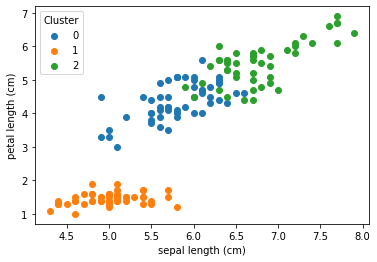

In [ ]:
for i in range(3):
    mask = (results == i)
    plt.scatter(X.loc[mask, 'sepal length (cm)'], X.loc[mask, 'petal length (cm)'], label=i)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(title="Cluster")
plt.show()

If we compare our K-means clusters with the "actual" target labels, we see that they're actually not that much different!

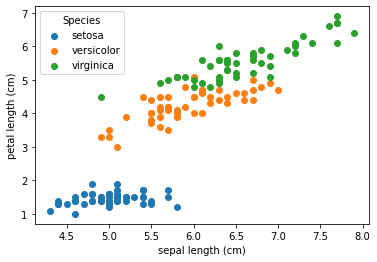

In [ ]:
for i in range(3):
    mask = (iris.target == i)
    plt.scatter(X.loc[mask, 'sepal length (cm)'], X.loc[mask, 'petal length (cm)'], label=iris.target_names[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(title="Species")
plt.show()

# Supervised Learning

As we mentioned earlier, most of your projects will involve supervised learning, which comes in two categories: 
* **regression** (continuous/numeric target), and 
* **classification** (discrete/categorical target).

But no matter which category of supervised learning you're using, you'll follow the same general steps.

## Fundamental concepts

Mathematically speaking, the goal of supervised learning is to take a set of *training observations* $\{x_1, x_2, \dots, x_n\}$ and their *target* labels $\{t_1, t_2, \dots, t_n\}$ and learn a *function* $y(x)$ such that $y(x_i) \approx t_i$ for all the training data.

Then, once we've trained this model on the *training set*, we want to know how well it **generalizes** to new data. To do this, we employ...

## Train-test split

<img src="https://miro.medium.com/max/933/1*-8_kogvwmL1H6ooN1A1tsQ.png" width="600">

We randomly split the whole dataset into two groups: training and testing. The standard is 80/20 or 70/30.

The model learns from (maximizes its fit to) the training set. Then, to see how well the model *generalizes*, we make predictions on the test observations and compare them with the actual test targets.

## Overfitting and Underfitting

The *purpose* of the train-test split is to see if our model **overfits** the data, **underfits** the data, or fits the data well.

<img src="https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480" width = "800px">

**Underfitting** &mdash; If a model underfits the data, it doesn't fully capture the "true" underlying process. 

To fix underfitting, we generally need to make our model more complex. For example, we can:
* Introduce more features
* Increase the number of model parameters

**Overfitting** &mdash; If a model overfits the data, it is beginning to learn the *noise* in the training data, limiting its ability to generalize to new examples.

To fix overfitting, we generally need to make our model simpler. We can:
* Reduce the number of features
  * Manually throw out some features, or
  * Use some algorithm to select the optimal subset of features 
* Use *regularization* to penalize the complexity of the parameters

### Bias-variance tradeoff

To understand overfitting and underfitting better, we need to introduce the idea of **bias-variance tradeoff**. Basically, no matter what ML algorithm we choose, we will always need to find a balance between its *bias* and its *variance*.

Model **bias** is its *training error* (typically measured by MSE for regression, or misclassification rate for classification). If a model has high bias, it is probably *underfitting* the training data.

Model **variance** is how *sensitive* a model is to the training data. If a model has high variance, its output may strongly depend on which subset of training data you use, so it is probably *overfitting* the training data.

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width="800px">

High bias: both the training error and the testing error are high.

High variance: the training error is low, and the testing error is high.

### Cross-validation

Another *more robust* strategy to determine how well our model generalizes is **cross-validation**.

To perform cross-validation, we divide our data into **three groups**: training, validation, and testing.

We use the *training set* to actually train our model and determine what the optimal parameters are. We train the model using different combinations of *hyperparameters* and calculate the model's *validation error* using the *validation set*. Typically, we'll choose the combination of hyperparameters which minimzes the validation error.

Finally, we estimate the model's generalization error using the *test set*.

There are two main techniques for cross-validation:

* **K-fold cross-validation**: Randomly divide the training observations into $K$ groups (or folds). For each iteration, one group is selected as the validation set, while the others are used as the training set.

* **Leave-one-out cross-validation (LOOCV)**: This is the same as K-fold, except we take $K$ to be equal to the number of training observations. In each iteration, just one observation is selected as the validation set, and we repeat over the entire training set.


(Credit: Machine Learning on Coursera by Andrew Ng)

# Anonymous feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into account for future presentations: https://forms.gle/C12vK71RJK6CraZv5

# References

Throughout the quarter, we will mainly be drawing our material from the following sources. Most of your learning will be done through trial and error, so we strongly encourage you to experiment by running code that you write from scratch!

For basic Python:
* The Python Tutorial: https://docs.python.org/3/tutorial/
* Basics of Python 3: https://www.learnpython.org/
* CodeAcademy Python 3 Course: https://www.codecademy.com/learn/learn-python-3

For the rest of the quarter:
* Introducing Data Science: http://bedford-computing.co.uk/learning/wp-content/uploads/2016/09/introducing-data-science-machine-learning-python.pdf 
* Python for Data Analysis: http://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf 
* Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 
* Sklearn user guide: https://scikit-learn.org/stable/user_guide.html 